<a href="https://colab.research.google.com/github/kdemertzis/UTh/blob/main/Malware_Families.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s et

In [2]:
import pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.clustering import *

In [3]:
# define the location of the dataset
url = 'https://raw.githubusercontent.com/kdemertzis/ML_BigData_CyberSecurity-test/master/Malware_Families/malware_families.csv'
# load the dataset
df = pd.read_csv(url, header=None)
# summarize the shape of the dataset
print(df.shape)

(1080, 77)


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [5]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1026, 77)
Unseen Data For Predictions: (54, 77)


In [7]:
exp_clu101 = setup(data, normalize = True, verbose=False, session_id = 123)

In [8]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1193,141.3103,2.0330,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [10]:
plot_model(kmeans)

In [11]:
ap = create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2691,40.4151,1.1337,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
plot_model(ap)

In [13]:
birch = create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0972,115.5526,2.3282,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
plot_model(birch)

In [16]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,Cluster
0,0.344930,0.626194,0.383583,2.534561,4.097317,0.303547,0.222829,4.592770,0.239427,1.360164,...,0.150683,0.163175,0.140664,0.151464,0.455172,0.252700,0.218868,0.249187,1.139493,Cluster 2
1,0.630001,0.839187,0.357777,2.651229,4.261675,0.253184,0.185257,3.816673,0.204940,1.716583,...,0.151166,0.107909,0.135334,0.109897,0.496423,0.155008,0.153219,NaN,1.642886,Cluster 1
2,0.555122,0.726229,0.278319,2.097249,2.897552,0.222222,0.174356,1.867880,0.203379,1.610137,...,0.152732,NaN,0.104839,NaN,0.344964,0.136109,0.155530,0.185484,1.657670,Cluster 3
3,0.275849,0.430764,0.285166,2.265254,3.250091,0.189258,0.157837,2.917610,0.202594,1.734746,...,0.142138,0.126636,0.123415,0.147373,0.390880,0.127944,0.207671,0.175357,0.893598,Cluster 3
4,0.304788,0.617299,0.335164,2.638236,4.876609,0.280590,0.199417,4.835421,0.236314,1.226532,...,0.155725,0.146540,0.149567,0.108966,0.470932,0.245277,0.202171,0.240372,0.795637,Cluster 2


In [17]:
plot_model(kmeans)

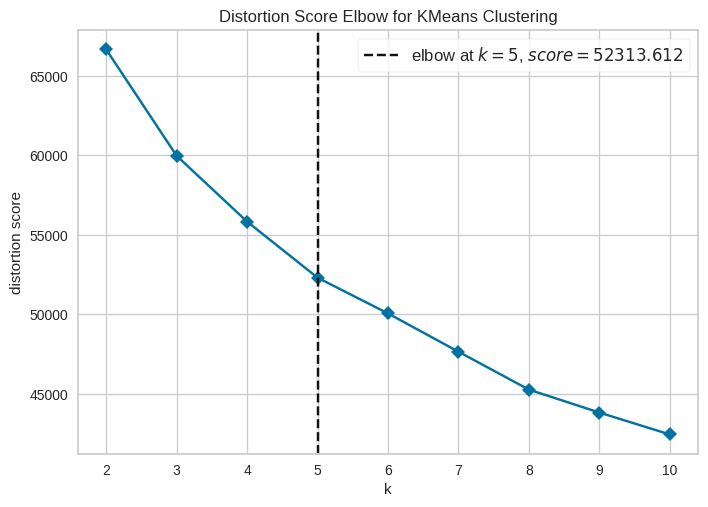

In [18]:
plot_model(kmeans, plot = 'elbow')

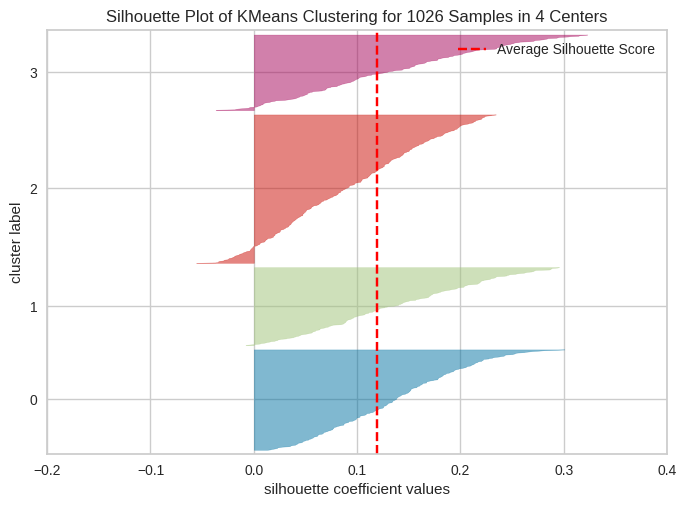

In [19]:
plot_model(kmeans, plot = 'silhouette')

In [20]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters